In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import os
import requests

In [9]:
import requests
url = 'https://lazyprogrammer.me/course_files/spam.csv'
r = requests.get(url, allow_redirects=True)

from io import StringIO
data = StringIO(r.text)
df=pd.read_csv(data,encoding='ISO-8859-1')

In [15]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [14]:
df.columns=['labels','data']

<Axes: >

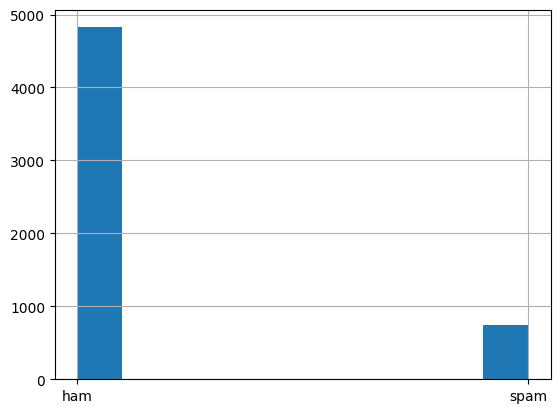

In [16]:
df['labels'].hist()

In [17]:
df['b_labels']=df['labels'].map({'ham':0,'spam':1})

In [18]:
y=df['b_labels'].to_numpy()

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(df['data'],y,test_size=0.3)

In [20]:
featurizer=CountVectorizer(decode_error='ignore')
xtrain=featurizer.fit_transform(xtrain)
xtest=featurizer.transform(xtest)

In [21]:
xtrain

<3900x7169 sparse matrix of type '<class 'numpy.int64'>'
	with 52026 stored elements in Compressed Sparse Row format>

In [22]:
model=MultinomialNB()
model.fit(xtrain,ytrain)
print('train acc :',model.score(xtrain,ytrain))
print('test acc :',model.score(xtest,ytest))

train acc : 0.9938461538461538
test acc : 0.9880382775119617


In [24]:
ptest=model.predict(xtest)
ptrain=model.predict(xtrain)

print('train acc :',f1_score(ytrain,ptrain))
print('test acc :',f1_score(ytest,ptest))

train acc : 0.9773156899810964
test acc : 0.9526066350710901


In [26]:
cm=confusion_matrix(ytrain,ptrain)
cm

array([[3359,    8],
       [  16,  517]], dtype=int64)

In [27]:
cm=confusion_matrix(ytest,ptest)
cm

array([[1451,    7],
       [  13,  201]], dtype=int64)

In [28]:
prob_train=model.predict_proba(xtrain)[:,1]
prob_test=model.predict_proba(xtest)[:,1]

print('train auc:',roc_auc_score(ytrain,prob_train))
print('test auc:',roc_auc_score(ytest,prob_test))

train auc: 0.9933679220733629
test auc: 0.983042318885171
